# ECED 4406 Assignment 0x001 Cryptography Notebook 
## By Matthew Cockbunrn B00788268

## Question 1 
### Part A 


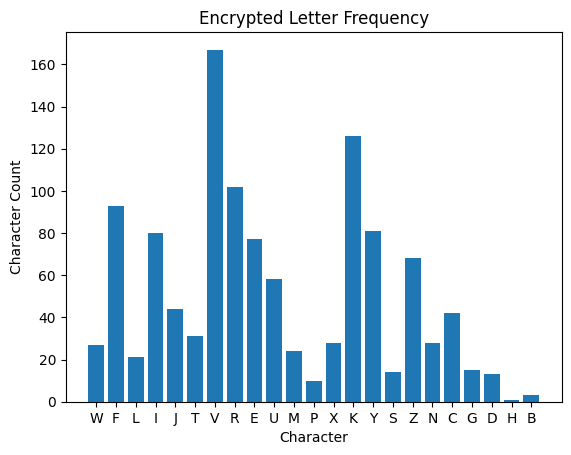

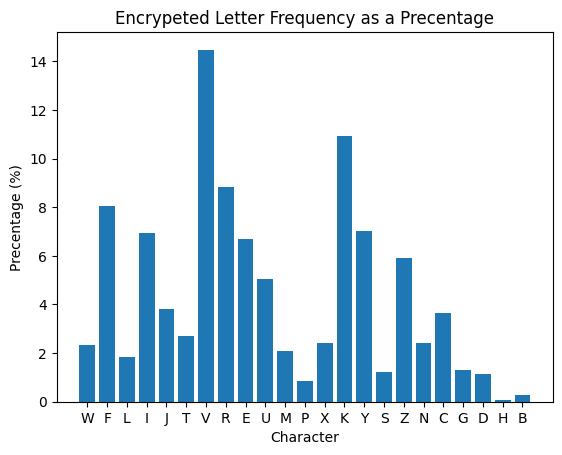

23


In [64]:
from xml.sax.saxutils import prepare_input_source
import matplotlib.pyplot as plt
# Input Raw Text
input = "Wflijtfiv reu jvmve pvrij rxf fli wrkyvij siflxyk wfiky, fe kyzj tfekzevek, r evn erkzfe, tfetvzmvu ze czsvikp, reu uvuztrkvu kf kyv gifgfjzkzfe kyrk rcc dve riv tivrkvu vhlrc. Efn nv riv vexrxvu ze r xivrk tzmzc nri, kvjkzex nyvkyvi kyrk erkzfe, fi rep erkzfe jf tfetvzmvu, reu jf uvuztrkvu, tre cfex veuliv. Nv riv dvk fe r xivrk srkkcv-wzvcu fw kyrk nri. Nv yrmv tfdv kf uvuztrkv r gfikzfe fw kyrk wzvcu, rj r wzerc ivjkzex-gcrtv wfi kyfjv nyf yviv xrmv kyvzi czmvj, kyrk kyrk erkzfe dzxyk czmv. Zk zj rckfxvkyvi wzkkzex reu gifgvi kyrk nv jyflcu uf kyzj. Slk, ze r crixvi jvejv, nv treefk uvuztrkv, nv treefk tfejvtirkv—nv treefk yrccfn—kyzj xifleu. Kyv sirmv dve, czmzex reu uvru, nyf jkilxxcvu yviv, yrmv tfejvtirkvu zk wri rsfmv fli gffi gfnvi kf ruu fi uvkirtk. Kyv nficu nzcc czkkcv efkv, efi cfex ivdvdsvi nyrk nv jrp yviv, slk zk tre evmvi wfixvk nyrk kyvp uzu yviv. Zk zj wfi lj kyv czmzex, irkyvi, kf sv uvuztrkvu yviv kf kyv lewzezjyvu nfib nyzty kyvp nyf wflxyk yviv yrmv kylj wri jf efscp rumretvu. Zk zj irkyvi wfi lj kf sv yviv uvuztrkvu kf kyv xivrk krjb ivdrzezex svwfiv lj—kyrk wifd kyvjv yfefivu uvru nv krbv zetivrjvu uvmfkzfe kf kyrk trljv wfi nyzty kyvp yviv xrmv kyv crjk wlcc dvrjliv fw uvmfkzfe—kyrk nv yviv yzxycp ivjfcmv kyrk kyvjv uvru jyrcc efk yrmv uzvu ze mrze—kyrk kyzj erkzfe, leuvi Xfu, jyrcc yrmv r evn sziky fw wivvufd, reu kyrk xfmviedvek fw kyv gvfgcv, sp kyv gvfgcv, wfi kyv gvfgcv, jyrcc efk gvizjy wifd kyv vriky."

letterFreq = {}
count = 0
for data in input.upper():
    if not data.isalpha():
        continue
    count += 1
    if data in letterFreq:
        letterFreq[data] += 1
    else:
        letterFreq[data] = 1

# Get the precentage Freq of letters
precentFreq = {}

for i in letterFreq.keys():
    precentFreq[i] = round((letterFreq[i] / count) * 100, 2)
# Graph Raw Data
plt.bar(range(len(letterFreq)),list(letterFreq.values()), align='center')
plt.xticks(range(len(letterFreq)), list(letterFreq.keys()))
plt.xlabel('Character')
plt.ylabel('Character Count')
plt.title('Encrypted Letter Frequency')
plt.show()

#Graph Precentage Frequence
plt.bar(range(len(precentFreq)), list(precentFreq.values()), align='center')
plt.xticks(range(len(precentFreq)),list(precentFreq.keys()))
plt.xlabel('Character')
plt.ylabel('Precentage (%)')
plt.title('Encrypeted Letter Frequency as a Precentage')
plt.show()

print(len(precentFreq))


### Part B Standard Engilsh Letter Frequency 
 
 Using the following source 

 > https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html 
 

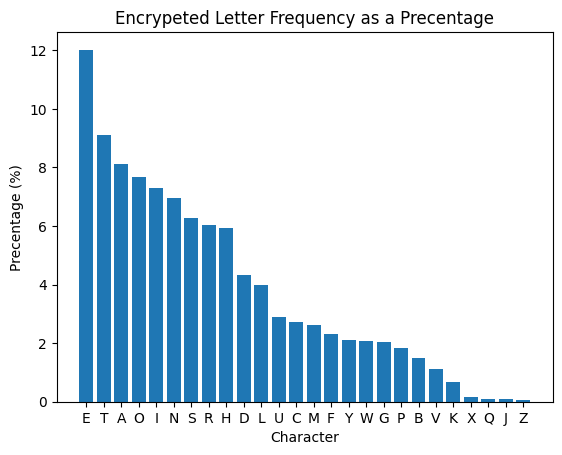

Fourscore and seven years ago our fathers brought forth, on this continent, a new nation, conceived in liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived, and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting-place for those who here gave their lives, that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we cannot dedicate, we cannot consecrate—we cannot hallow—this ground. The brave men, living and dead, who struggled here, have consecrated it far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so n

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

rawData = pd.read_html("https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html ")
numTables = len(rawData)
#print(numTables)
freq_data = rawData[0]
#print(freq_data)
values = freq_data.iloc[:,3:5]
values = values.drop(labels=0, axis=0)

values[4] = values[4].astype(float)

plt.bar(values[3], values[4], align='center')
plt.xlabel('Character')
plt.ylabel('Precentage (%)')
plt.title('Encrypeted Letter Frequency as a Precentage')
plt.show()


def clamp(min, max, val):
    temp = ord(data) - 17
    if temp < min:
        wrap_val = min - temp
        temp =  max - wrap_val + 1
    return chr(temp)

def shift(letter):
    if letter.isupper():
        letter = clamp(65,90,letter)
    else:
        letter = clamp(97,122,letter)
    return letter        

# shift value is 17
output = ""
for data in input:
    if not data.isalpha():
       output += data
    else:
        output += shift(data)
print(output)        
        

# Question 2
## Encryption 

In [22]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
#Function to pad bytes
def pad_bytes(text):
    bytesToPad = len(text) % 8
    text+= " " * (bytesToPad)
    return text

key =os.urandom(16)

cipher = Cipher(algorithms.AES128(key), modes.ECB())

encryptor = cipher.encryptor()
plainText = "Matthew Cockburn - B00788268"
plainText = pad_bytes(plainText)
#encode msg in UTF-8 
plainText = plainText.encode('utf-8')
print("Plain Text: ")
print(plainText)
ciphertext = encryptor.update(plainText) + encryptor.finalize()
print("Cipher Text: " )
print(ciphertext)


28
4
Plain Text: 
b'Matthew Cockburn - B00788268    '
Cipher Text: 
b'Ag\xdb\xf9\xad\xb6"\xff#\xe2\x0f\xc8u\xb9\x02\xc0\xaa\xc0#\xa1\xcc8\x8d\x0eP\xd4\x9fF_\xa2\xcfy'


## Decryption 

In [19]:
decryptor = cipher.decryptor()
decryptedText = decryptor.update(ciphertext) + decryptor.finalize()
print(decryptedText)

b'Matthew Cockburn - B00788268    '


# Question 3
## Part A

Assuming binary data is for the un-encrypted message with the byte padding for the AES Block size

In [26]:
def simpleHash(data):
    return sum(data)

hash_1 = simpleHash(plainText)
print("{:02x}".format(hash_1))


907


## Part B

Using this simple hash function is a bad approach to generating hashes/checksums as thers is a potenital for a hash collisions. This is when two or multiple files generate the same hash. This simple hash is also deterministic, meaning it will also generate the same hash provide the contents of the file do not change.

Instead you can use a SHA or MD5 hash, the 'good' hash alogrithm being used will be SHA-256 which will generate a 256 bit hash for the given file


In [27]:
from cryptography.hazmat.primitives import hashes 

hash_inst = hashes.Hash(hashes.SHA256())
hash_inst.update(plainText)
hash = hash_inst.finalize()
print(hash)


b':%\x8a\x82\xed\xbc\xdb\x88>\x05\xb6\xc0"9\xa3~\x88y_\x08\xb5N\xd3\x00$\xab\xba\x0c\xab\x8f1\x07'
